In [66]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

forces         = np.array([0   , 1   , 3   , 5   , 7   ])*9.81
muscleB_rest   = 59.5/100.0
muscleB_length = [np.array(0)]*6
muscleB_length[0] = np.array([56.6, 59.4, 61.2, 62.2, 63.2])/100.0
muscleB_length[1] = np.array([53.0, 56.4, 59.5, 61.2, 62.2])/100.0
muscleB_length[2] = np.array([50.2, 51.3, 55.3, 58.5, 60.5])/100.0
muscleB_length[3] = np.array([47.4, 48.6, 51.5, 54.3, 57.2])/100.0
muscleB_length[4] = np.array([46.2, 47.0, 49.1, 51.5, 53.5])/100.0
muscleB_length[5] = np.array([45.1, 45.8, 47.6, 49.4])/100.0 # blew up

0.0011018882578515592
0.0015569632542109595
0.0015775933207125858
0.001414979855346828
0.0010569875248774327
0.0008650065530799473


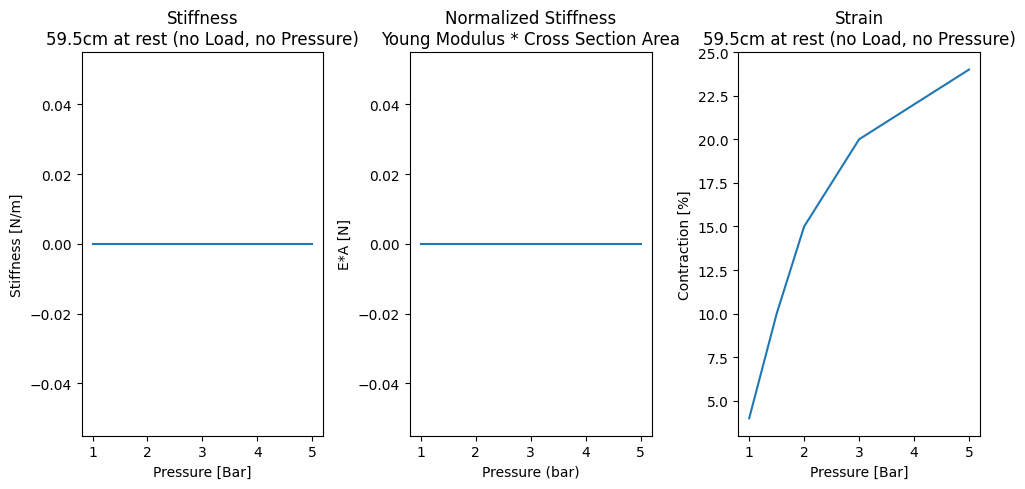

In [79]:
muscleB_dx = [np.array(0)]*6
muscleB_strain = np.array([0]*6)
for i in range(6):
    muscleB_dx[i] = np.array([x - muscleB_length[i][0] for x in muscleB_length[i]])
    muscleB_strain[i] = 100.0*(muscleB_rest - muscleB_length[i][0]) / muscleB_rest

stiffnesses = np.array([0]*6)
for i in range(6):
    regression_model = LinearRegression(fit_intercept=False)
    #print(muscleB_strain[i], forces)
    regression_model.fit(muscleB_dx[i].reshape((len(muscleB_dx[i]), 1)), forces[0:len(muscleB_dx[i])])
    print(regression_model.coef_[0])
    stiffnesses[i] = regression_model.coef_[0]

plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 3, 1)
ax.set_title(f"Stiffness\n{round(muscleB_rest*100, 2)}cm at rest (no Load, no Pressure)")
ax.plot([1, 1.5, 2, 3, 4, 5], stiffnesses)
ax.set_xlabel("Pressure [Bar]")
ax.set_ylabel("Stiffness [N/m]")

ax = plt.subplot(1, 3, 2)
ax.set_title(f"Normalized Stiffness\nYoung Modulus * Cross Section Area")
ax.plot([1, 1.5, 2, 3, 4, 5], stiffnesses*muscleB_rest, label="Stiffness")
ax.set_xlabel("Pressure (bar)")
ax.set_ylabel("E*A [N]")

ax = plt.subplot(1, 3, 3)
ax.set_title(f"Strain\n{round(muscleB_rest*100, 2)}cm at rest (no Load, no Pressure)")
ax.plot([1, 1.5, 2, 3, 4, 5], muscleB_strain)
ax.set_xlabel("Pressure [Bar]")
ax.set_ylabel("Contraction [%]")
plt.tight_layout()


In [76]:
#np.rad2deg(np.arcsin((4*20)/(600*0.2*0.1)))
#muscleB_dx[0].reshape((len(muscleB_dx[0]), 1))
forces[0:len(muscleB_dx[0])]


array([ 0.  ,  9.81, 29.43, 49.05, 68.67])